# Norway-Volkswagen-Sales-Prediction

##### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONHASHSEED']=str(0)
import tensorflow
import random as rn

In [2]:
# Import the dataset
volkswagen = pd.read_csv("volkswagen.csv")

In [3]:
# Creating Date column using the Year and Month features
volkswagen['Date'] = pd.to_datetime(volkswagen.Year.astype(str) + '/' + volkswagen.Month.astype(str) + '/01')

In [4]:
# Creating dataframe with Date and Quantity features 
df = volkswagen[['Date', 'Quantity']]
df.head()

,Date,Quantity
0,2007-01-01,1267
1,2007-01-01,720
2,2007-01-01,235
3,2007-01-01,218
4,2007-02-01,602


In [5]:
# Using groupby() to sum the quantity for each month
df = df.groupby(['Date']).sum()
df

,Quantity
Date,
2007-01-01,2440
2007-02-01,1395
2007-03-01,1314
2007-04-01,1113
2007-05-01,1796
...,...
2016-09-01,1726
2016-10-01,1764
2016-11-01,1627


In [6]:
# Removing Date from index
df1 = df.reset_index()
df1

,Date,Quantity
0,2007-01-01,2440
1,2007-02-01,1395
2,2007-03-01,1314
3,2007-04-01,1113
4,2007-05-01,1796
...,...,...
116,2016-09-01,1726
117,2016-10-01,1764
118,2016-11-01,1627
119,2016-12-01,1670


##### Volkswagen Quantities distribution

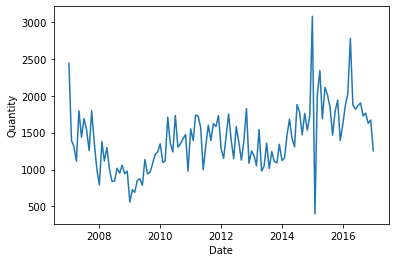

In [7]:
plt.plot(df1.Date,df1.Quantity)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

### Machine Learning Models
##### Preparing data for forecasting using Machine Learning

In [8]:
df_m = pd.DataFrame()
print(df_m)

Empty DataFrame
Columns: []
Index: []


In [9]:
# Creating 12 months of lag values to predict current observation
# Shift of 12 months in this case
for i in range(12,0,-1):
    df_m[['t-'+str(i)]] = df.shift(i)
print(df_m)

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Date                                                                         
2007-01-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-02-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-03-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-04-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-05-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2016-09-01  1466.0  1791.0  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0   
2016-10-01  1791.0  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0   
2016-11-01  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0   
2016-12-01  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0  1866.0   
2017-01-01  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0  1866

In [10]:
# Create column t (original column)
df_m['t'] = df.values
print(df_m.head(12))

            t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Date                                                                       
2007-01-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-02-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-03-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-04-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-05-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2007-06-01   NaN     NaN     NaN     NaN     NaN     NaN     NaN  2440.0   
2007-07-01   NaN     NaN     NaN     NaN     NaN     NaN  2440.0  1395.0   
2007-08-01   NaN     NaN     NaN     NaN     NaN  2440.0  1395.0  1314.0   
2007-09-01   NaN     NaN     NaN     NaN  2440.0  1395.0  1314.0  1113.0   
2007-10-01   NaN     NaN     NaN  2440.0  1395.0  1314.0  1113.0  1796.0   
2007-11-01   NaN     NaN  2440.0  1395.0  1314.0  1113.0  1796.0  1437.0   
2007-12-01  

In [11]:
# Creating a new subsetted dataframe, removing Nans from first 12 rows
df_m = df_m[12:]
print(df_m)

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Date                                                                         
2008-01-01  2440.0  1395.0  1314.0  1113.0  1796.0  1437.0  1690.0  1539.0   
2008-02-01  1395.0  1314.0  1113.0  1796.0  1437.0  1690.0  1539.0  1258.0   
2008-03-01  1314.0  1113.0  1796.0  1437.0  1690.0  1539.0  1258.0  1798.0   
2008-04-01  1113.0  1796.0  1437.0  1690.0  1539.0  1258.0  1798.0  1368.0   
2008-05-01  1796.0  1437.0  1690.0  1539.0  1258.0  1798.0  1368.0  1014.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2016-09-01  1466.0  1791.0  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0   
2016-10-01  1791.0  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0   
2016-11-01  1940.0  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0   
2016-12-01  1394.0  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0  1866.0   
2017-01-01  1608.0  1871.0  2028.0  2777.0  1878.0  1817.0  1866

In [12]:
df_m.shape

(109, 13)

In [13]:
# Split Data into dependent(target) and independent(features) variables

quantity = df_m.values
# Lagged variables (features) and original time series data (target)
X = quantity[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
Y = quantity[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [14]:
X.shape

(109, 12)

In [15]:
Y.shape

(109,)

##### Splitting the data to train and test sets

In [16]:
# Target(Y) Train-Test split

traintarget_size = int(len(Y) * 0.8)   # Set split
train_target, test_target = Y[:traintarget_size], Y[traintarget_size:len(Y)]

print('Observations for Target: %d' % (len(Y)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 109
Training Observations for Target: 87
Testing Observations for Target: 22


In [17]:
# Features(X) Train-Test split

trainfeature_size = int(len(X) * 0.8)
train_feature, test_feature = X[:trainfeature_size], X[trainfeature_size:len(X)]
print('Observations for feature: %d' % (len(X)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 109
Training Observations for feature: 87
Testing Observations for feature: 22


In [18]:
train_feature

array([[2440., 1395., 1314., ..., 1798., 1368., 1014.],
       [1395., 1314., 1113., ..., 1368., 1014.,  790.],
       [1314., 1113., 1796., ..., 1014.,  790., 1379.],
       ...,
       [1121., 1158., 1451., ..., 1760., 1532., 1725.],
       [1158., 1451., 1682., ..., 1532., 1725., 3078.],
       [1451., 1682., 1424., ..., 1725., 3078.,  398.]])

### Models
##### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [20]:
reg.score(test_feature, test_prediction)

1.0

In [21]:
from sklearn import metrics
RMSE_train_lr = np.sqrt(metrics.mean_squared_error(train_target, train_prediction))
print('Train Score: %.3f RMSE' % (RMSE_train_lr))
RMSE_test_lr = np.sqrt(metrics.mean_squared_error(test_target, test_prediction))
print('Test Score: %.3f RMSE' % (RMSE_test_lr))

Train Score: 283.935 RMSE
Test Score: 500.011 RMSE


##### Decision Trees Regressor

In [22]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(random_state=0)  # max_depth not set

# Fit the model to the training features and targets
decision_tree.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree.score(train_feature, train_target))
print(decision_tree.score(test_feature,test_target)) 

1.0
-12.310173158520026


- The R-squared value is negative which indicates that the predictions are horrible.

In [23]:
# Using for loop to try different depths to optimize the model for best prediction
for d in [2,3,4,5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=0)
    decision_tree.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_feature, train_target))
    print(decision_tree.score(test_feature, test_target), '\n') 
    
# R-square for train and test scores are below.

max_depth= 2
0.4479871072732551
-11.835822153213869 

max_depth= 3
0.5819958091401387
-16.057680211366602 

max_depth= 4
0.6703863340362939
-11.343878697087744 

max_depth= 5
0.7701991544682134
-16.58053810775528 

max_depth= 6
0.8577801485973005
-12.080489314696099 

max_depth= 7
0.920069492330119
-16.365710518365923 

max_depth= 8
0.9607982855562062
-12.140600901219049 

max_depth= 9
0.9816208126019714
-16.43752737147442 

max_depth= 10
0.9913207522315127
-12.188323469428886 



- Still the R-squared values are negative. For max_depth = 4, the R-squared value is higher.

Train Score: 214.370 RMSE
Test Score: 1096.426 RMSE


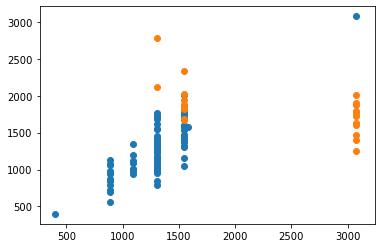

In [24]:
# Plot of predicted vs actual values

# Use the best max_depth 
decision_tree = DecisionTreeRegressor(max_depth=4, random_state = 0)
decision_tree.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree.predict(train_feature)

RMSE_train_dt = np.sqrt(metrics.mean_squared_error(train_target, train_prediction))
print('Train Score: %.3f RMSE' % (RMSE_train_dt))


test_prediction = decision_tree.predict(test_feature)

RMSE_test_dt = np.sqrt(metrics.mean_squared_error(test_target, test_prediction))
print('Test Score: %.3f RMSE' % (RMSE_test_dt))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

##### Random Forest Regressor

In [25]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.887712302696827
-4.605177372933638


In [26]:
from sklearn.model_selection import ParameterGrid
# Hyperparameter tuning
grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
test_scores = []

# Looping through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print("Best test score with parameters",test_scores[best_idx], ParameterGrid(grid)[best_idx])  

Best test score with parameters -1.447689566764923 {'random_state': 13, 'n_estimators': 200, 'max_features': 2, 'max_depth': 2}


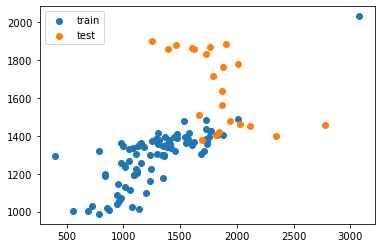

In [27]:
# Using the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=2, max_features = 2, random_state=13)
rfr.fit(train_feature, train_target)

# Making predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [28]:
# RMSE
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(train_target, train_prediction))
print('Train Score: %.3f RMSE' % (RMSE_train_rf))
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(test_target, test_prediction))
print('Test Score: %.3f RMSE' % (RMSE_test_rf))

Train Score: 267.694 RMSE
Test Score: 488.238 RMSE


##### Feature Importance for random forest regressor

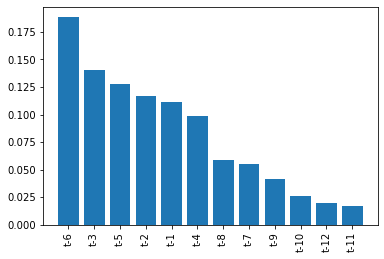

In [29]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

- (t-6) feature is the significant feature followed by (t-3), (t-5). The significant difference between (t-6) and (t-3) is low.

##### Gradient Boosting Regressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Creating Gradient Boost model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=8,
                                learning_rate=0.01,
                                n_estimators=400,
                                subsample=0.6,
                                random_state=0)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.9121835458012567
-4.088894686445911


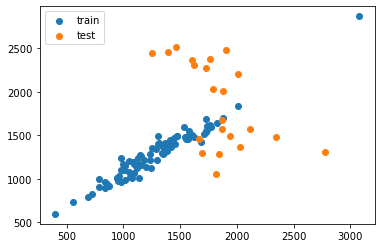

In [31]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [32]:
# RMSE
RMSE_train_gbr = np.sqrt(metrics.mean_squared_error(train_target, train_prediction))
print('Train Score: %.3f RMSE' % (RMSE_train_gbr))
RMSE_test_gbr = np.sqrt(metrics.mean_squared_error(test_target, test_prediction))
print('Test Score: %.3f RMSE' % (RMSE_test_gbr))

Train Score: 110.650 RMSE
Test Score: 703.988 RMSE


##### Feature importance for gradient boost regressor

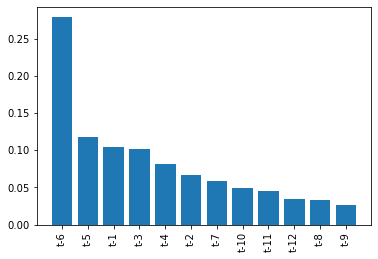

In [33]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(X.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

- (t-6) is the most significant feature. The significant difference between (t-6) and (t-5) is high.

### LSTM 
##### Preparing data for LSTM

In [34]:
df1.head()

,Date,Quantity
0,2007-01-01,2440
1,2007-02-01,1395
2,2007-03-01,1314
3,2007-04-01,1113
4,2007-05-01,1796


##### Extracting the Quantity values

In [35]:
df_lstm = df1.iloc[:,1].values
df_lstm

array([2440, 1395, 1314, 1113, 1796, 1437, 1690, 1539, 1258, 1798, 1368,
       1014,  790, 1379, 1116, 1297, 1006,  840,  841, 1017,  952, 1057,
        942,  979,  559,  727,  691,  854,  874,  786, 1135,  941,  964,
       1079, 1203, 1238, 1348, 1096, 1118, 1709, 1359, 1238, 1733, 1302,
       1350, 1415, 1473,  977, 1551, 1393, 1739, 1724, 1570,  998, 1316,
       1601, 1395, 1622, 1583, 1731, 1287, 1152, 1444, 1753, 1404, 1147,
       1582, 1369, 1128, 1384, 1826, 1084, 1252, 1185, 1051, 1543,  979,
       1047, 1357, 1012, 1244, 1108, 1090, 1342, 1121, 1158, 1451, 1682,
       1424, 1307, 1880, 1775, 1470, 1760, 1532, 1725, 3078,  398, 2006,
       2342, 1689, 2114, 2012, 1844, 1466, 1791, 1940, 1394, 1608, 1871,
       2028, 2777, 1878, 1817, 1866, 1903, 1726, 1764, 1627, 1670, 1253],
      dtype=int64)

In [36]:
df_lstm = df_lstm.reshape(-1,1) # Reshaping the array

In [37]:
df_lstm = df_lstm.astype('float32') # Converting the datatype to float

In [38]:
df_lstm.shape

(121, 1)

##### Scaling the dataframe

In [39]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the data
scalar =MinMaxScaler()
df_scalar=scalar.fit_transform(df_lstm)

In [40]:
# Split into train and test
train = df_scalar[:-12,:]
test = df_scalar[-12:,:]

In [41]:
print(len(train), len(test))

109 12


In [42]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stamp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stamp-1):
        a = sequence[i:(i+time_stamp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stamp, 0])
    return np.array(dataX),  np.array(dataY)

In [43]:
time_stamp = 1

In [44]:
# Applying the 2D array function to train and test datasets
X_train, Y_train = create_data(train,time_stamp)
X_test, Y_test =create_data(test, time_stamp)

In [45]:
# Transforming the input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

##### LSTM Model

In [46]:
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Setting the seed
np.random.seed(10)
tensorflow.random.set_seed(10)
rn.seed(10)
# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(64, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(X_train, Y_train, batch_size=32, epochs =20, verbose=2)

Using TensorFlow backend.


Epoch 1/20
 - 1s - loss: 0.1432
Epoch 2/20
 - 0s - loss: 0.1371
Epoch 3/20
 - 0s - loss: 0.1298
Epoch 4/20
 - 0s - loss: 0.1233
Epoch 5/20
 - 0s - loss: 0.1165
Epoch 6/20
 - 0s - loss: 0.1100
Epoch 7/20
 - 0s - loss: 0.1037
Epoch 8/20
 - 0s - loss: 0.0979
Epoch 9/20
 - 0s - loss: 0.0919
Epoch 10/20
 - 0s - loss: 0.0888
Epoch 11/20
 - 0s - loss: 0.0812
Epoch 12/20
 - 0s - loss: 0.0767
Epoch 13/20
 - 0s - loss: 0.0733
Epoch 14/20
 - 0s - loss: 0.0673
Epoch 15/20
 - 0s - loss: 0.0616
Epoch 16/20
 - 0s - loss: 0.0574
Epoch 17/20
 - 0s - loss: 0.0531
Epoch 18/20
 - 0s - loss: 0.0491
Epoch 19/20
 - 0s - loss: 0.0447
Epoch 20/20
 - 0s - loss: 0.0421


In [47]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
Y_train = scalar.inverse_transform([Y_train])
test_predict = scalar.inverse_transform(test_predict)
Y_test = scalar.inverse_transform([Y_test])
# calculate root mean squared error
train_score = np.sqrt(metrics.mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score))
test_score_lstm = np.sqrt(metrics.mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score_lstm))

Train Score: 528.550 RMSE
Test Score: 887.327 RMSE


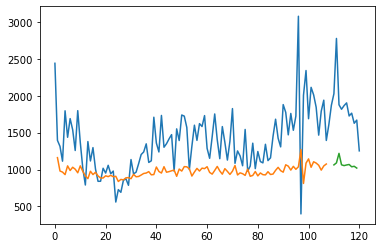

In [48]:
# shifting train
train_plot = np.empty_like(df_scalar) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stamp:len(train_predict)+time_stamp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df_scalar)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(df_scalar)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df_scalar))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

### Simple Moving Average

In [49]:
df.head()

,Quantity
Date,
2007-01-01,2440
2007-02-01,1395
2007-03-01,1314
2007-04-01,1113
2007-05-01,1796


In [50]:
# Calculating the Moving Average and Error
df['SMA_12'] = df.Quantity.rolling(12, min_periods=1).mean()
df['Error_12']=df['Quantity']-df['SMA_12']

Text(0, 0.5, 'Demand')

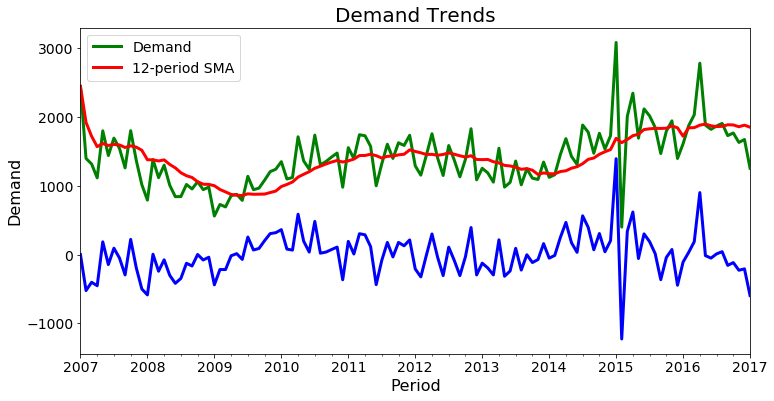

In [51]:
# colors for the line plot
colors = ['green', 'red', 'blue']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand', '12-period SMA'], fontsize=14)

# title and labels
plt.title('Demand Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

In [52]:
# KPI
MAE = df.Error_12.abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE_SMA = np.sqrt((df.Error_12**2).mean())
print("RMSE:",round(RMSE_SMA,2))
MSE= (df.Error_12**2).mean()
print("MSE:",round(MSE,2))

MAE: 222.35
RMSE: 312.67
MSE: 97763.15


### Exponential Smoothing

In [53]:
df.head()

,Quantity,SMA_12,Error_12
Date,,,
2007-01-01,2440,2440.000000,0.000000
2007-02-01,1395,1917.500000,-522.500000
2007-03-01,1314,1716.333333,-402.333333
2007-04-01,1113,1565.500000,-452.500000
2007-05-01,1796,1611.600000,184.400000


In [54]:
# Eliminating the simple moving average and error features
df = df.drop(columns=['SMA_12','Error_12'])
df.head()

,Quantity
Date,
2007-01-01,2440
2007-02-01,1395
2007-03-01,1314
2007-04-01,1113
2007-05-01,1796


##### Decomposing the Time Series

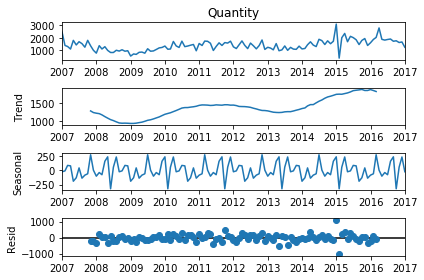

In [55]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Quantity'], freq=20)

# Plot decomposition
decomp.plot()
plt.show()

##### Stationary Test

In [56]:
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Quantity'])
# Print test statistic
print(result)

(-1.7126565829427867, 0.42460350541663583, 4, 116, {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}, 1544.9587710071473)


- The timeseries is non-stationary as the p-value is greater than 0.05 and the test statistic value is greater than the first significant value.

##### Auto Correlation Plot

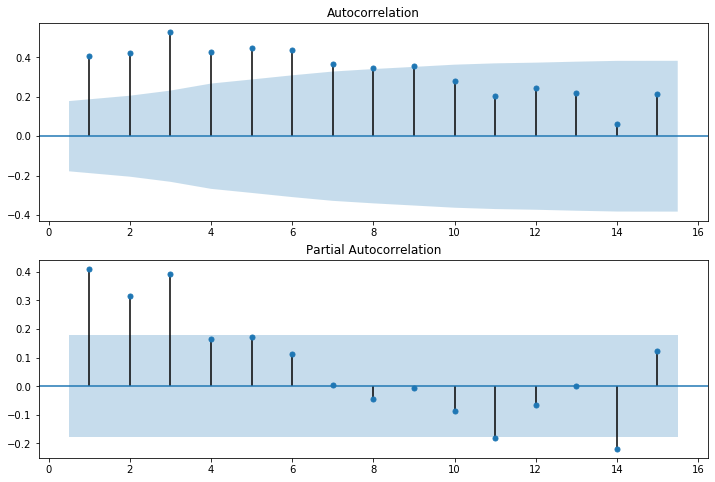

In [57]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

In [58]:
# Splitting the data to train and test sets
train = df[:100]
test = df[100:]

##### Simple Exponential Smoothing

MAE 215.73
MSE 95,596.45
RMSE 309.19


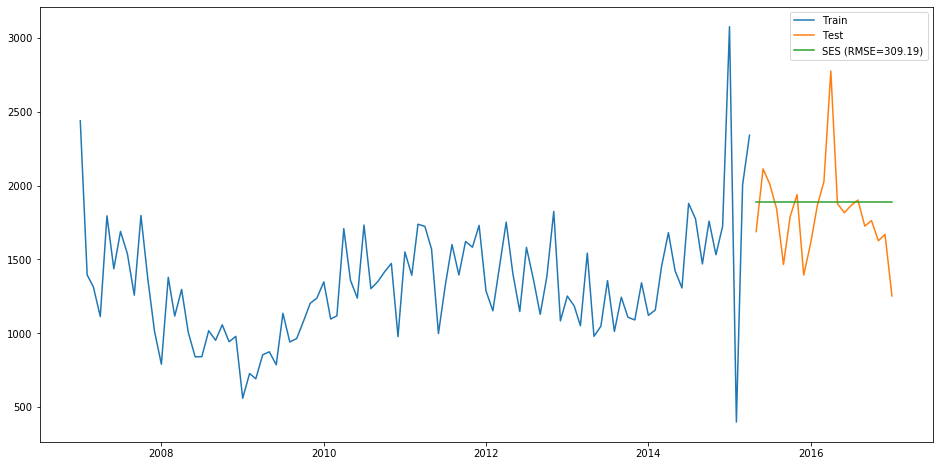

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Quantity'])).fit(smoothing_level=0.3,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = metrics.mean_absolute_error(test.Quantity, pred.SES)
mse = metrics.mean_squared_error(test.Quantity, pred.SES)
rmse_SES = np.sqrt(metrics.mean_squared_error(test.Quantity, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_SES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse_SES)) 
plt.legend()
plt.show()

##### Double Exponential Smoothing

MAE 744.15
MSE 740,395.25
RMSE 860.46


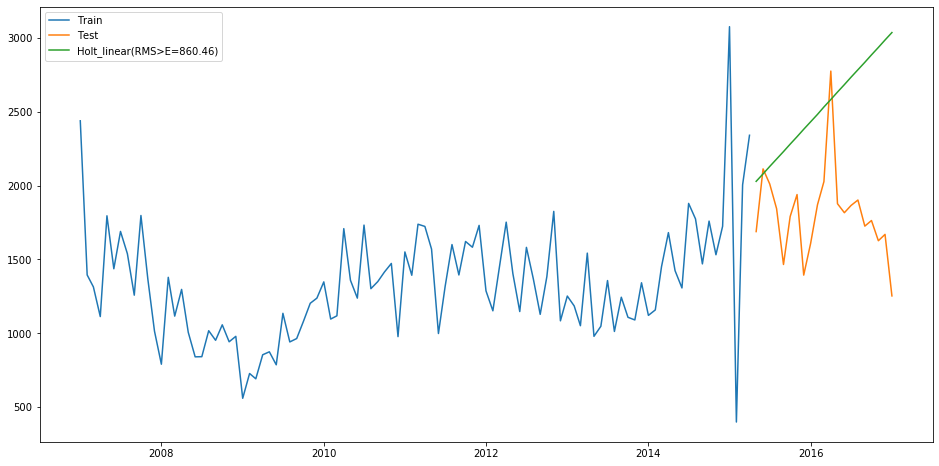

In [60]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Quantity'])).fit(smoothing_level = 0.3,smoothing_slope = 0.2)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = metrics.mean_absolute_error(test.Quantity, pred.Holt_linear)
mse=metrics.mean_squared_error(test.Quantity, pred.Holt_linear)
rmse_DES = np.sqrt(metrics.mean_squared_error(test.Quantity, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_DES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMS>E={:.2f})'.format(rmse_DES))
plt.legend()
plt.show()

##### Triple Exponential Smoothing

MAE 518.91
MSE 402,671.94
RMSE 634.56


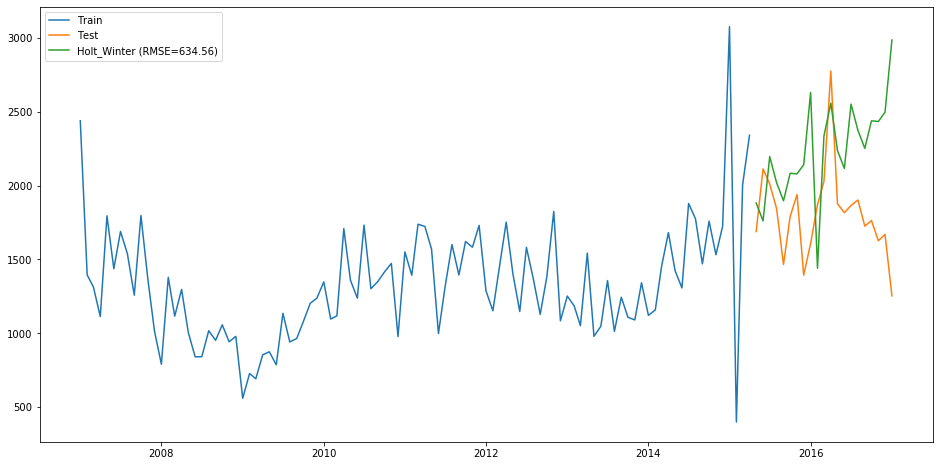

In [61]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Quantity']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = metrics.mean_absolute_error(test.Quantity, pred.Holt_Winter)
mse=metrics.mean_squared_error(test.Quantity, pred.Holt_Winter)
rmse_TES = np.sqrt(metrics.mean_squared_error(test.Quantity, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_TES))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse_TES))

plt.legend()
plt.show()

### Seasonal Forecasting

##### Making the time series stationary

- We have conducted the stationarity test earlier and found that time series is non-stationary. To achieve stationarity, we use diff() function.

In [62]:
# Using diff() function to make the timeseries stationary
df_diff = df.diff().dropna()

In [63]:
# Run Dicky-Fuller test
result = adfuller(df_diff['Quantity'])
# Print test statistic
print(result)

(-8.925560837845717, 1.013575901098973e-14, 3, 116, {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}, 1532.1895176549513)


- Now the p-value is less than 0.05 and the test statistic is less than the significant values. So, the time series is stationary now

##### Auto Correlation Plot

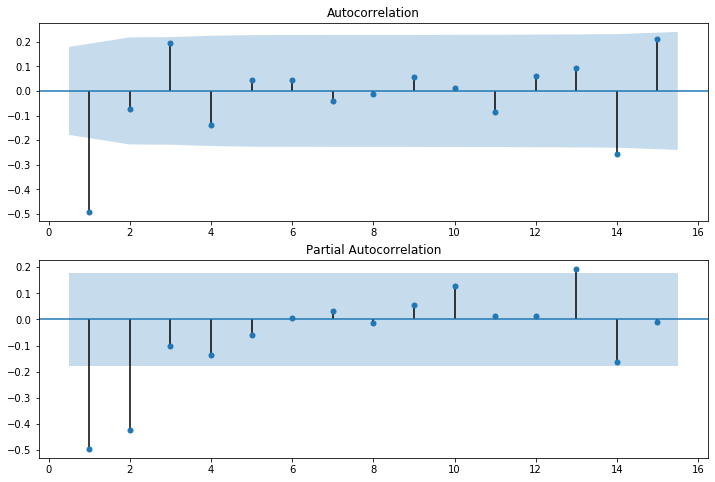

In [64]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

##### Seasonal Forecasting

In [65]:
import pmdarima as pm

# Check for seasonal parameters
model = pm.auto_arima(df_diff, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1800.292, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1690.578, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1730.045, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1668.889, Time=2.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1668.820, Time=2.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1672.700, Time=0.84 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1669.922, Time=3.06 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.93 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1737.235, Time=1.53 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1626.757, Time=2.30 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1630.293, Time=0.85 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1628.155, Time=1.18 sec
 ARIMA(2,1,0)(2,1,2)[12]          

- From the above results, we can consider (0,1,2) for trend order(p,d,q), and (2,1,1) for seasonal order (P,D,Q) with 12 periods.

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Build the model
model = SARIMAX(df_diff, order=(0, 1, 2), seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results = model.fit()
results.summary()

C:\Users\Sunil Kumar\anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sunil Kumar\anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                -606.040
Date:                              Tue, 13 Apr 2021   AIC                           1224.080
Time:                                      12:24:29   BIC                           1238.594
Sample:                                  02-01-2007   HQIC                          1229.911
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.7647      0.087    -20.250      0.000      -1.935      -1.594
ma.L2          0.8080      0.085      9.478      0.000       0.641       0.975
ar.S.L12      -0.3740      0.243     -1.541      0.123      -0.850       0.102
ar.S.L24      -0.2655      0.188     -1.413      0.158      -0.634       0.103
ma.S.L12      -0.6064      0.234     -2.597      0.009      -1.064      -0.149
sigma2      1.187e+05    1.3e+04      9.121      0.000    9.32e+04    1.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):               124.23
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Plot Diagnostics

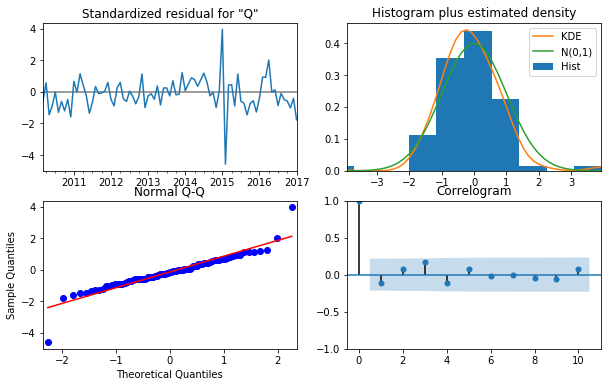

In [67]:
results.plot_diagnostics(figsize=(10,6))
plt.show()

- In the residual plot, there seems to be no observed pattern.
- In the histogram plot, the histogram is partially normal and the KDE curve distribution is uniform.
- In the Q-Q plot, most of the datapoints are on the line and there are outliers too.
- In the correlogram, the auto correlations show no certain pattern.

##### One Step Ahead Forecast

In [68]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Quantity']
upper_limits = confidence_intervals.loc[:,'upper Quantity']

# Print best estimate predictions
print(mean_forecast)

2016-02-01    -55.935985
2016-03-01   -159.945246
2016-04-01     57.134919
2016-05-01   -889.620427
2016-06-01   -106.189401
2016-07-01    350.558225
2016-08-01     72.354992
2016-09-01     -6.672694
2016-10-01    241.297084
2016-11-01    214.407980
2016-12-01    185.244728
2017-01-01    193.356175
Freq: MS, Name: predicted_mean, dtype: float64


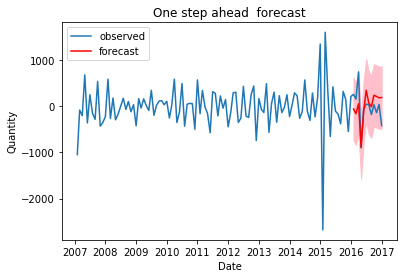

In [69]:
# plot the  data
plt.plot(df_diff.index, df_diff, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.title("One step ahead  forecast")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

- In the above plot, the forecast is not much similar to the observed values pattern.

##### Dynamic Prediction

In [70]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Quantity']
upper_limits = confidence_intervals.loc[:,'upper Quantity']

# Print best estimate predictions
print(mean_forecast)
print(confidence_intervals)

2016-02-01    -55.935985
2016-03-01     83.877801
2016-04-01    285.631649
2016-05-01   -388.227402
2016-06-01   -170.857559
2016-07-01    327.995270
2016-08-01   -217.265495
2016-09-01    -79.731884
2016-10-01     66.573267
2016-11-01     21.837249
2016-12-01   -111.787776
2017-01-01     71.401054
Freq: MS, Name: predicted_mean, dtype: float64
            lower Quantity  upper Quantity
2016-02-01     -731.413572      619.541603
2016-03-01     -766.378696      934.134299
2016-04-01     -565.130338     1136.393635
2016-05-01    -1239.491943      463.037139
2016-06-01    -1022.624493      680.909374
2016-07-01     -524.273859     1180.264399
2016-08-01    -1070.036506      635.505516
2016-09-01     -933.004290      773.540523
2016-10-01     -787.199951      920.346485
2016-11-01     -832.436273      876.110771
2016-12-01     -966.559629      742.984076
2017-01-01     -783.857927      926.660034


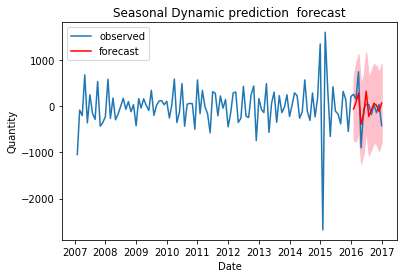

In [71]:
# plot the  data
plt.plot(df_diff.index, df_diff, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title("Seasonal Dynamic prediction  forecast")
plt.legend()
plt.show()

- The forecast in the above plot is slightly similar to the observed values pattern.

##### Out of Samples Prediction

In [72]:
forecast = results.get_forecast(steps = 24)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Quantity']
upper_limits = confidence_intervals.loc[:,'upper Quantity']

# Print best estimate predictions
print(mean_forecast)

2017-02-01     83.296308
2017-03-01    272.661664
2017-04-01    252.164449
2017-05-01   -426.042099
2017-06-01   -123.352694
2017-07-01    307.292410
2017-08-01   -210.692141
2017-09-01   -207.406865
2017-10-01    119.778910
2017-11-01    -67.410179
2017-12-01   -108.495777
2018-01-01    383.999486
2018-02-01   -951.622460
2018-03-01    592.892645
2018-04-01    306.569417
2018-05-01   -559.367711
2018-06-01      7.244927
2018-07-01    148.845952
2018-08-01   -194.240754
2018-09-01   -271.156762
2018-10-01    143.637309
2018-11-01    -39.258641
2018-12-01   -229.974039
2019-01-01    230.206767
Freq: MS, Name: predicted_mean, dtype: float64


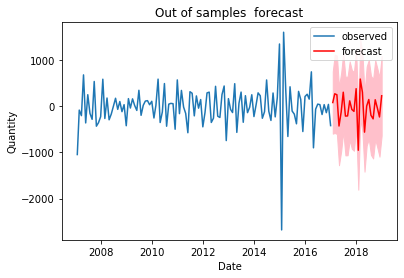

In [73]:
# plot the  data
plt.plot(df_diff.index, df_diff, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.title("Out of samples  forecast")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

- From the above plot, we can say that the forecast seems to be in accordance with the actual values pattern.

In [74]:
# Creating a dataframe for RMSE values of all methods
rmse = {'Model':['Linear Regression','Decision Trees Regressor','Random Forest Regressor','Gradient Boost',
                 'LSTM-model','Simple Moving Average','Simple Exponential Smoothing','Double Exponential Smoothing',
                 'Triple Exponential Smoothing'],
        'RMSE':[RMSE_test_lr,RMSE_test_dt,RMSE_test_rf,RMSE_test_gbr,test_score_lstm,RMSE_SMA,rmse_SES,rmse_DES,rmse_TES]}

rmse = pd.DataFrame(rmse, columns = ['Model','RMSE'])
rmse.sort_values(by='RMSE') # sorting in ascending order

,Model,RMSE
6,Simple Exponential Smoothing,309.186760
5,Simple Moving Average,312.671000
2,Random Forest Regressor,488.238306
0,Linear Regression,500.010928
8,Triple Exponential Smoothing,634.564368
3,Gradient Boost,703.988255
7,Double Exponential Smoothing,860.462232
4,LSTM-model,887.327132
1,Decision Trees Regressor,1096.426451
